In [1]:
import os
os.chdir('/pi/zhiping.weng-umw/data/ramirezc/Splice/SpliceAI/spliceai/')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pickle_serialize import save
from pickle_serialize import load
from gene_centric_gencode_evaluator import GencodeSpliceSiteEvaluator

2025-01-17 07:26:42.496956: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-17 07:26:44.178529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737116804.370143 2426407 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737116804.418565 2426407 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-17 07:26:45.081787: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
# Initialize evaluator
evaluator = GencodeSpliceSiteEvaluator(
    gencode_gtf="/data/Splice/data/gencode.v47.basic.annotation.gtf",
    fasta_file="/data/genomes/hg38/hg38.fa"
)
# Generate ground truth from GENCODE
acceptor_truth, donor_truth = evaluator.parse_gencode()

# save(acceptor_truth, "acceptor_truth")
# save(donor_truth, "donor_truth")

# # Generate predictions using SpliceAI
# acceptor_pred, donor_pred = evaluator.generate_spliceai_predictions(acceptor_truth)

# save(acceptor_pred, "splice_ai_acceptor_pred")
# save(donor_pred, "splice_ai_donor_pred")

In [4]:
# Load saved predictions 
acceptor_pred, donor_pred = evaluator.load_predictions(
    "splice_ai_acceptor_pred.pkl",
    "splice_ai_donor_pred.pkl"
)

# Get metrics including top-k accuracy
acc_precision, acc_recall, acc_auprc, acc_topk = evaluator.calculate_metrics(
    acceptor_truth, acceptor_pred
)
don_precision, don_recall, don_auprc, don_topk = evaluator.calculate_metrics(
    donor_truth, donor_pred  
)

/tmp/ipykernel_2426407/2584306947.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("auprc_topk_spliceai.png", dpi=300)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


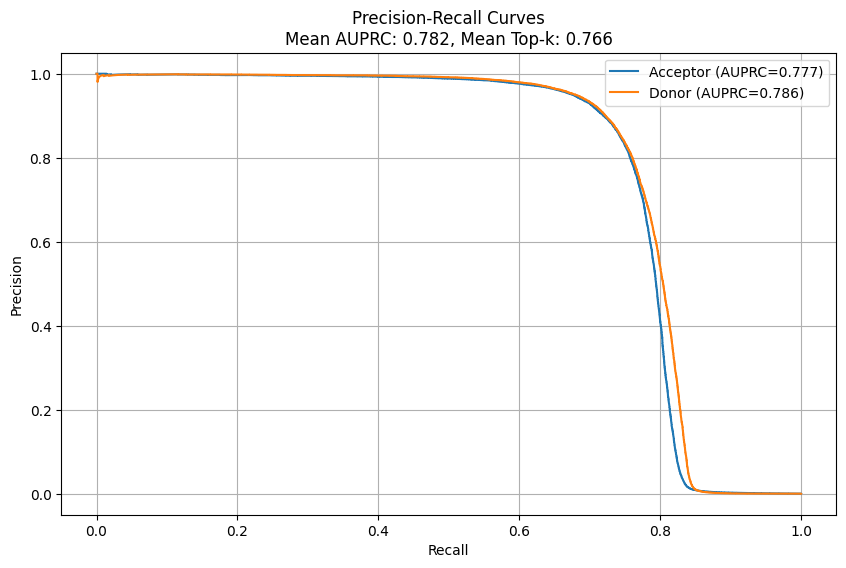

Acceptor AUPRC: 0.7767, Top-k: 0.7647
Donor AUPRC: 0.7864, Top-k: 0.7672
Mean AUPRC: 0.7815, Mean Top-k: 0.7660


In [5]:
# Calculate mean metrics
mean_auprc = (acc_auprc + don_auprc) / 2
mean_topk = (acc_topk + don_topk) / 2

# Plot precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(acc_recall, acc_precision, label=f'Acceptor (AUPRC={acc_auprc:.3f})')
plt.plot(don_recall, don_precision, label=f'Donor (AUPRC={don_auprc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curves\nMean AUPRC: {mean_auprc:.3f}, Mean Top-k: {mean_topk:.3f}')
plt.legend()
plt.grid(True)
plt.savefig("auprc_topk_spliceai.png", dpi=300)
plt.show()

# Print results
print(f"Acceptor AUPRC: {acc_auprc:.4f}, Top-k: {acc_topk:.4f}")
print(f"Donor AUPRC: {don_auprc:.4f}, Top-k: {don_topk:.4f}")
print(f"Mean AUPRC: {mean_auprc:.4f}, Mean Top-k: {mean_topk:.4f}")

In [3]:
# !jupyter nbconvert --to python Splice/SpliceAI/spliceai/evaluate_sptransform_gene_centric_gencode.ipynb

[NbConvertApp] Converting notebook Splice/SpliceAI/spliceai/evaluate_sptransform_gene_centric_gencode.ipynb to python
[NbConvertApp] Writing 2174 bytes to Splice/SpliceAI/spliceai/evaluate_sptransform_gene_centric_gencode.py
